# Loading libraries

In [2]:
import glob2 as glob
import re
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import numpy as np
import statsmodels.api as sm

import pandas as pd
pd.option_context("display.max_columns", None)

## Loading data

In [5]:
testDF = pd.read_csv('/content/drive/MyDrive/Research/IBM Advanced Data Science/sim_train_DF.csv')
testDF.head()

,name,rssi,timestamp,experiment,user_at,timestamp2,beacon_at
0,kitchen1,-44.358269,1.0,1,kitchen,0.0,kitchen
1,kitchen1,-53.050031,2.0,1,kitchen,0.0,kitchen
2,kitchen1,-52.284467,3.0,1,kitchen,1.0,kitchen
3,kitchen1,-51.959420,4.0,1,kitchen,1.0,kitchen
4,kitchen1,-57.639364,5.0,1,kitchen,1.0,kitchen


## Removing noise

In order to get better results for the model it would be better to remove the noise. 

A Savitzky-Golay as well as a lowess filter are applied in order to reduce the noise.

### Checking signals

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


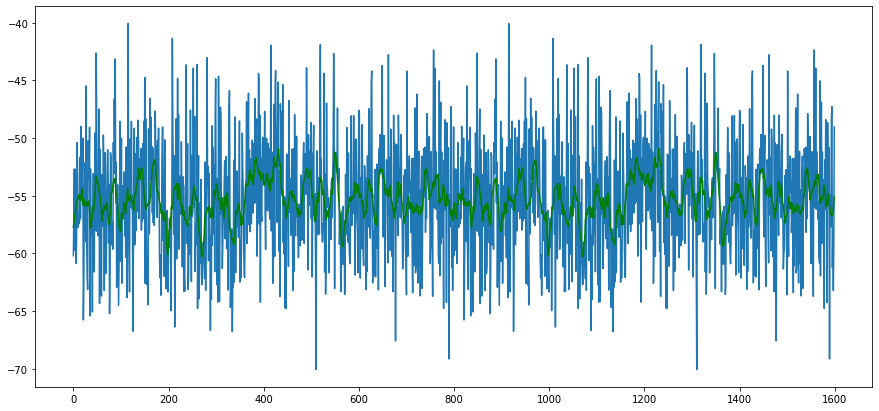

In [9]:
# Filtering
beacon = 'living'
tmpDf = testDF[(testDF['experiment'] == 2) & (testDF['beacon_at'] == beacon) & (testDF['user_at'] == beacon)]
tmpDf['id']=range(0,len(tmpDf))

y_hat = savgol_filter(tmpDf['rssi'], 25, 3)

plt.figure(figsize = (15, 7))
plt.plot(tmpDf['id'], tmpDf['rssi'])
plt.plot(tmpDf['id'], y_hat, color='green')
plt.show()

In [ ]:
#?savgol_filter
# scipy.signal.savgol_filter(x, window_length, polyorder, deriv=0, delta=1.0, axis=- 1, mode='interp', cval=0.0)[source]

Changing parameters of Savgol's filter

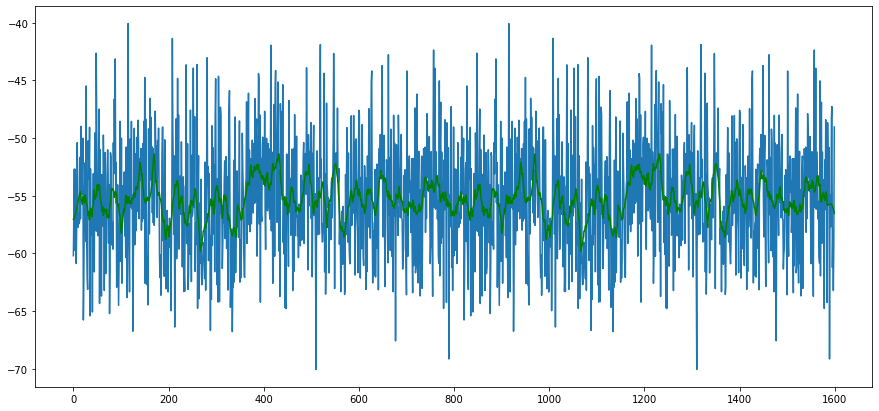

In [10]:
y_hat = savgol_filter(tmpDf['rssi'], 31, 3)

plt.figure(figsize = (15, 7))
plt.plot(tmpDf['id'], tmpDf['rssi'])
plt.plot(tmpDf['id'], y_hat, color='green')
plt.show()

Implementing loess filter

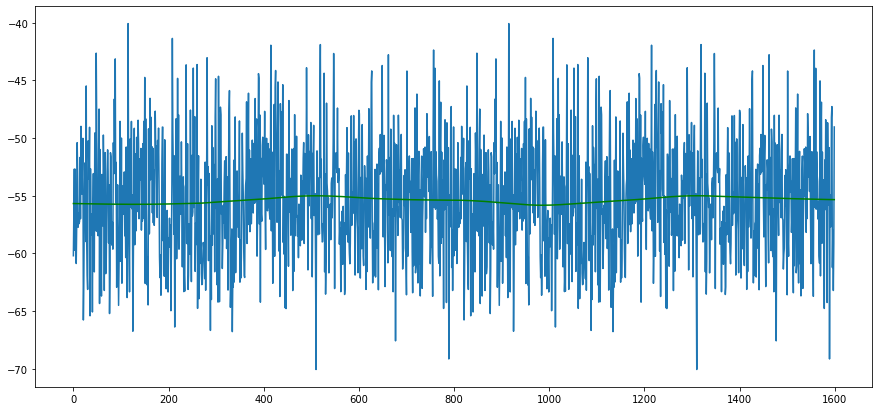

In [14]:
# %%
y_loess = sm.nonparametric.lowess(tmpDf['rssi'], tmpDf['id'], frac = 1./3)
#y_loess = sm.nonparametric.lowess(tmpDf['rssi'], tmpDf['id'], frac = 1./2)
y_hat_loess = list(y_loess[:,1])
#print(y_hat_loess)

plt.figure(figsize=(15, 7))
plt.plot(tmpDf['id'], tmpDf['rssi'])
plt.plot(tmpDf['id'], y_hat_loess, color='green')
plt.show()

-55.66726459163159 -55.18450260828506


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


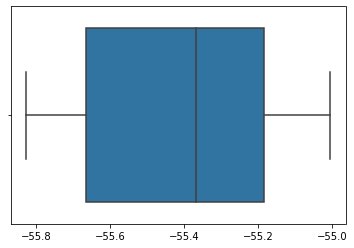

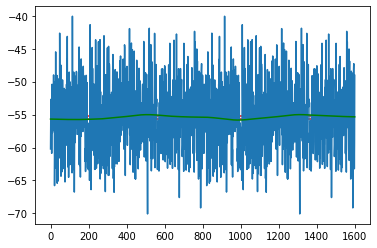

In [15]:
q1, q3 = np.percentile(sorted(y_hat_loess), [25, 75])
print(q1, q3)

sns.boxplot(y_hat_loess)
plt.show()

plt.plot(tmpDf['id'], tmpDf['rssi'])
plt.plot(tmpDf['id'], y_hat_loess, color='green')
plt.hlines([q1, q3], xmin=0, xmax=len(tmpDf), color='red')
plt.show()

# Summary

We will use a loess filter to smooth the RSSI from the beacons and thus improve the results. This algorithm will be applied to all the signals from beacons.